In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



In [6]:
df = pd.read_csv("winequality-red.csv")





,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
feature_list = df.columns[:-1].values
label = [df.columns[-1]]

In [16]:
print(feature_list)
print(label)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
['quality']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

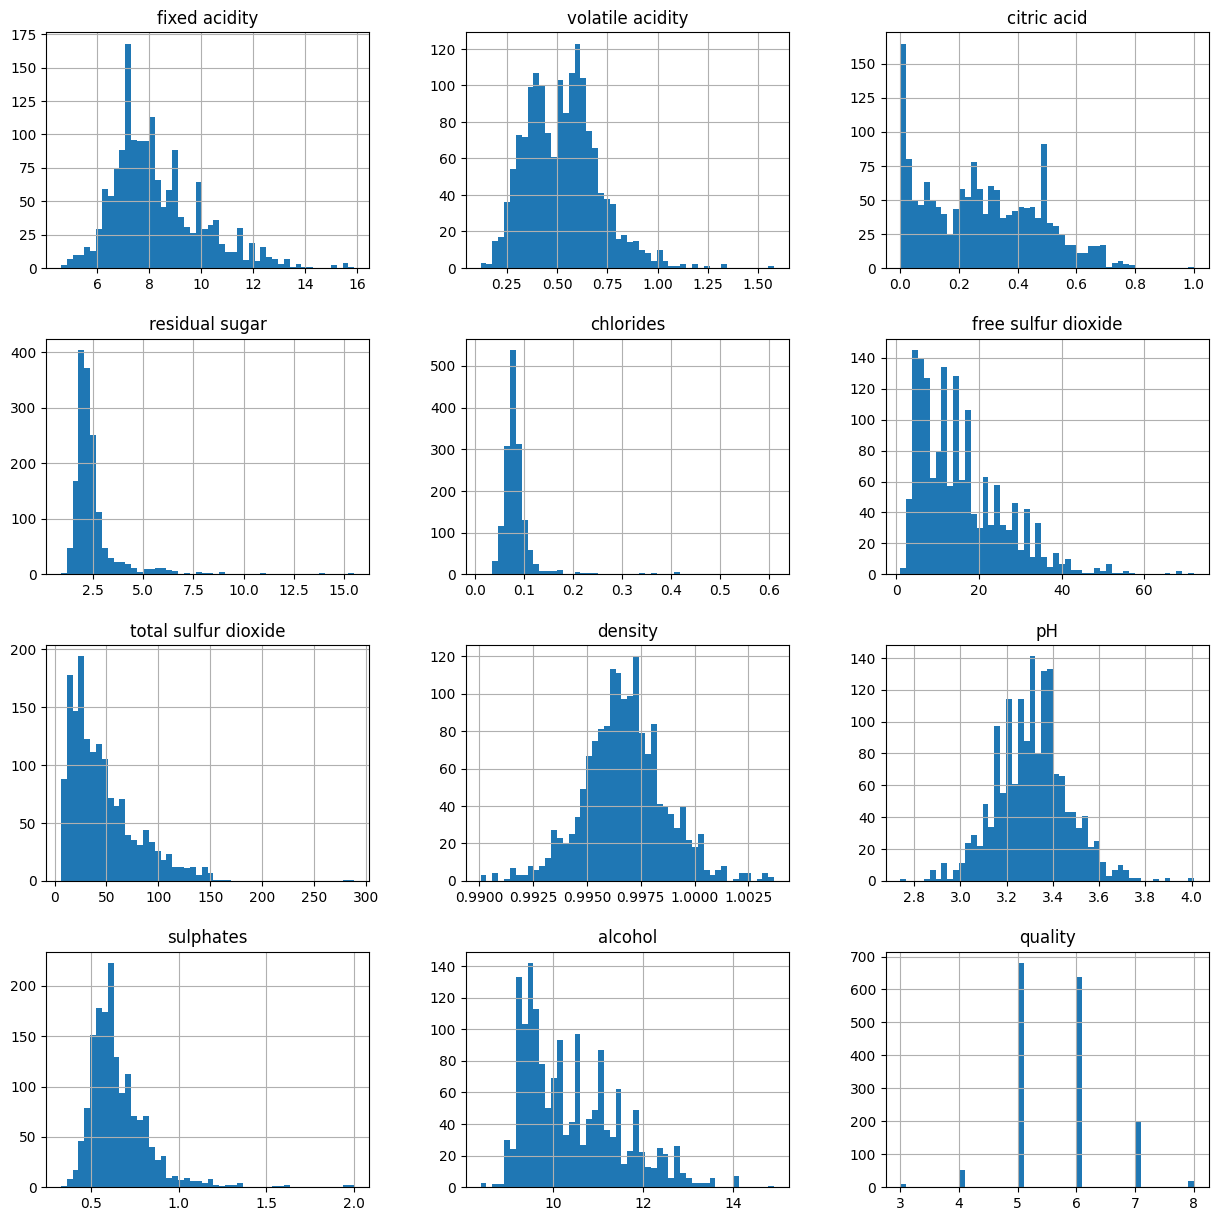

In [22]:
df.hist( bins=50, figsize=(15,15) )

In [28]:
set_train, set_test = train_test_split( df, test_size=0.2  )

In [31]:
set_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
226,8.9,0.59,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6
1402,7.6,0.30,0.42,2.0,0.052,6.0,24.0,0.99630,3.44,0.82,11.9,6
488,11.6,0.32,0.55,2.8,0.081,35.0,67.0,1.00020,3.32,0.92,10.8,7
1391,8.0,0.64,0.22,2.4,0.094,5.0,33.0,0.99612,3.37,0.58,11.0,5
888,6.8,0.57,0.00,2.5,0.072,32.0,64.0,0.99491,3.43,0.56,11.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
471,9.6,0.54,0.42,2.4,0.081,25.0,52.0,0.99700,3.20,0.71,11.4,6
1138,7.5,0.41,0.15,3.7,0.104,29.0,94.0,0.99786,3.14,0.58,9.1,5
89,7.0,0.62,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0,5
819,9.1,0.66,0.15,3.2,0.097,9.0,59.0,0.99976,3.28,0.54,9.6,5


In [32]:
set_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
449,11.9,0.39,0.69,2.8,0.095,17.0,35.0,0.99940,3.10,0.61,10.8,6
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.5,7
264,12.5,0.56,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
1298,5.7,0.60,0.00,1.4,0.063,11.0,18.0,0.99191,3.45,0.56,12.2,6
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
50,8.8,0.66,0.26,1.7,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,5
27,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
884,8.8,0.61,0.19,4.0,0.094,30.0,69.0,0.99787,3.22,0.50,10.0,6
1162,8.5,0.32,0.42,2.3,0.075,12.0,19.0,0.99434,3.14,0.71,11.8,7


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

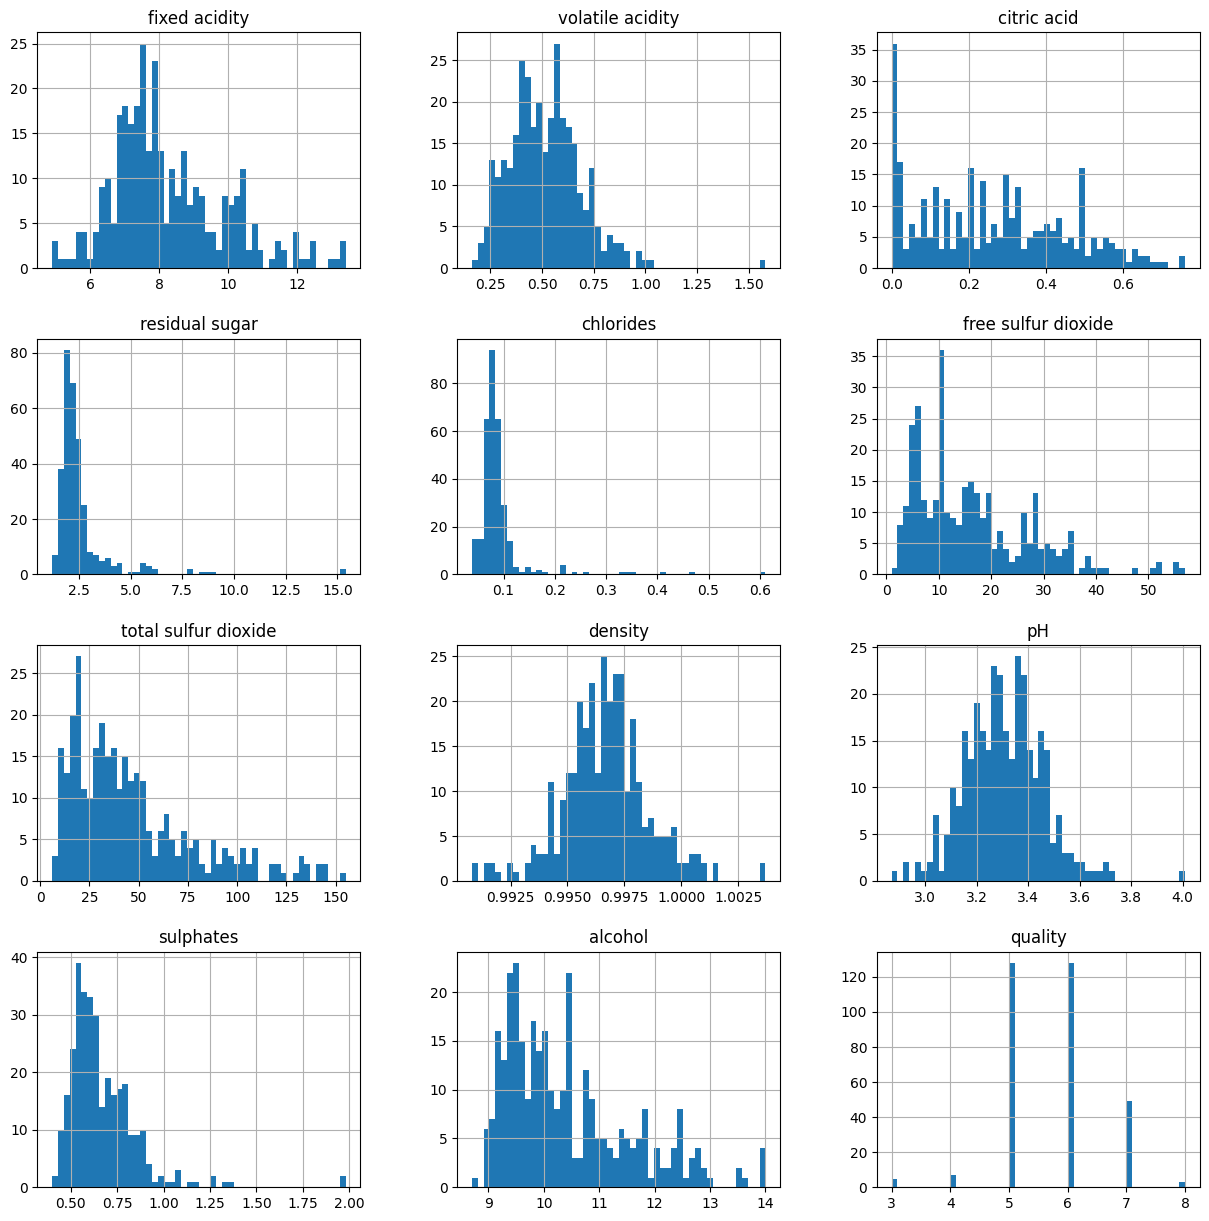

In [41]:
set_test.hist( bins=50, figsize=(15,15) )

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

In [43]:
sss = StratifiedShuffleSplit(  n_splits=1, test_size=0.2   )

for train_i, test_i in sss.split( df, df['quality'] ):
  s_train_set = df.loc[train_i]
  s_test_set = df.loc[test_i]




In [44]:
s_train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1339,7.5,0.51,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,6
559,13.0,0.47,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6
992,6.5,0.40,0.10,2.0,0.076,30.0,47.0,0.99554,3.36,0.48,9.4,6
553,5.0,1.04,0.24,1.6,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
1579,6.2,0.56,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5
42,7.5,0.49,0.20,2.6,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6
937,12.0,0.63,0.50,1.4,0.071,6.0,26.0,0.99791,3.07,0.60,10.4,4
1537,5.4,0.58,0.08,1.9,0.059,20.0,31.0,0.99484,3.50,0.64,10.2,6


In [50]:
s_test_set['quality'].value_counts() / len(s_test_set)

quality
5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: count, dtype: float64

In [51]:
set_test['quality'].value_counts() / len(set_test)

quality
6    0.400000
5    0.400000
7    0.153125
4    0.021875
3    0.015625
8    0.009375
Name: count, dtype: float64

In [52]:
df['quality'].value_counts() / len(df)

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: count, dtype: float64

In [55]:
wine_f = s_train_set.drop('quality', axis=1)
wine_l = s_train_set['quality'].copy()

In [56]:
wine_l

1339    6
559     6
992     6
553     5
1579    5
       ..
1436    5
42      6
937     4
1537    6
971     6
Name: quality, Length: 1279, dtype: int64

In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( strategy="median" )

In [62]:
imputer.fit(wine_f)

SimpleImputer(strategy='median')

In [63]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.079  , 14.     ,
       38.     ,  0.99676,  3.31   ,  0.62   , 10.2    ])

In [64]:
wine_f.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99676
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [66]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ordinal_encoder = OrdinalEncoder()
cat_ecoder = OneHotEncoder()


In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


transform_pipeline = Pipeline([
                    ('imputer',SimpleImputer( strategy="median" )  ),
                    ('std_scaler',StandardScaler()),
                              ])


transform_pipeline


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [69]:
wine_f_tr = transform_pipeline.fit_transform(wine_f)
wine_f_tr

array([[-0.48142117, -0.09342803, -1.30676782, ...,  0.30037981,
        -0.69906878,  0.06814455],
       [ 2.59223757, -0.31318793,  1.09673657, ..., -0.08012773,
         0.1156091 ,  2.13362166],
       [-1.04026821, -0.69776775, -0.89766069, ...,  0.30037981,
        -1.04821644, -0.96459401],
       ...,
       [ 2.03339053,  0.56585167,  1.14787496, ..., -1.53873995,
        -0.34992112, -0.02574078],
       [-1.65499996,  0.2911518 , -0.99993747, ...,  1.18823073,
        -0.11715601, -0.21351142],
       [ 1.13923526, -1.4669274 ,  1.04559818, ...,  0.11012604,
         1.22124335,  0.44368584]])

In [73]:
wine_l

1339    6
559     6
992     6
553     5
1579    5
       ..
1436    5
42      6
937     4
1537    6
971     6
Name: quality, Length: 1279, dtype: int64

In [76]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
model = l_reg.fit( wine_f_tr, wine_l)
model

LinearRegression()

In [77]:
from sklearn.metrics import mean_squared_error

q_pred = model.predict( wine_f_tr  )
mean_squared_error( wine_l, q_pred )

0.4146067413002201

In [83]:
wine_f_test = s_test_set.drop("quality", axis=1)
wine_l_test = s_test_set['quality'].copy()

In [84]:
wine_f_test_tr = transform_pipeline.transform( wine_f_test )
wine_f_test_tr

array([[ 2.9834305 , -0.61535779,  2.068366  , ..., -1.60215787,
         0.81390442, -0.40128207],
       [ 0.85981174, -0.97246763,  0.68762944, ..., -0.65088903,
        -0.93183388, -0.87070869],
       [-0.20199765,  0.40103175, -0.99993747, ..., -0.58747111,
        -1.68832048,  2.41527763],
       ...,
       [-0.31376705, -0.47800785,  0.02283035, ..., -0.58747111,
         0.05741782, -0.96459401],
       [-0.76084469,  1.14272141, -1.15335264, ...,  0.49063358,
        -0.52449495, -0.58905272],
       [ 0.13331058, -0.03848805,  0.53421426, ..., -0.71430695,
        -0.81545133, -0.96459401]])

In [85]:
q_pred_test = model.predict( wine_f_test_tr  )
mean_squared_error( wine_l_test, q_pred_test )

0.4319356754745048

Text(0, 0.5, 'Predicted Quality')

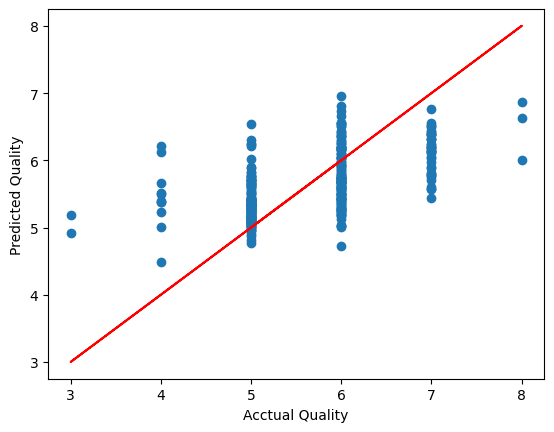

In [87]:
plt.scatter(wine_l_test,q_pred_test   )
plt.plot( wine_l_test,wine_l_test,'r-'  )


plt.xlabel("Acctual Quality")
plt.ylabel("Predicted Quality")

In [89]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
model_reg = tree_reg.fit( wine_f_tr, wine_l )

In [90]:
q_pred_reg = model_reg.predict( wine_f_tr  )
mean_squared_error( wine_l, q_pred_reg )

0.0

In [91]:
q_pred_reg_test = model_reg.predict( wine_f_test_tr  )
mean_squared_error( wine_l_test, q_pred_reg_test )

0.478125

Text(0, 0.5, 'Predicted Quality')

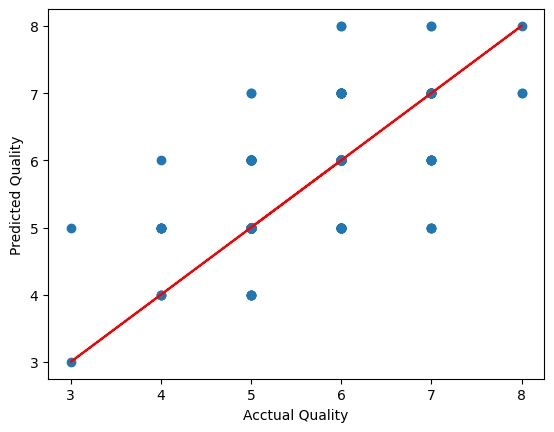

In [92]:
plt.scatter(wine_l_test,q_pred_reg_test   )
plt.plot( wine_l_test,wine_l_test,'r-'  )


plt.xlabel("Acctual Quality")
plt.ylabel("Predicted Quality")

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
def display_scores(scores):
  print ("Scores:", scores)
  print("Mean:", scores.mean() )
  print("STD", scores.std())

In [96]:
scores = cross_val_score( l_reg,wine_f_tr, wine_l  )
display_scores( scores )

Scores: [0.33560689 0.35073218 0.38398657 0.31170832 0.36256073]
Mean: 0.348918935685703
STD 0.024417068551111597


In [97]:
scores = cross_val_score( tree_reg,wine_f_tr, wine_l  )
display_scores( scores )

Scores: [-0.15642665 -0.12636642  0.00957035 -0.01206581  0.0671243 ]
Mean: -0.043632845696513246
STD 0.0844529332914062


In [98]:
from sklearn.model_selection import GridSearchCV

In [101]:
wine_f_tr.shape

(1279, 11)

In [103]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

model_forest = forest_reg.fit( wine_f_tr,wine_l  )





In [107]:
param_grid= [

             {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
             { 'bootstrap': [False], 'n_estimators': [3,10],'max_features': [2,4,6] }
]

In [108]:
grid_search = GridSearchCV( forest_reg,param_grid, cv=5,scoring='neg_mean_squared_error' , return_train_score=True    )

In [109]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [110]:
model_gird = grid_search.fit( wine_f_tr, wine_l )

In [111]:
grid_search.cv_results_

{'mean_fit_time': array([0.0090446 , 0.02564073, 0.08099451, 0.01091027, 0.03438416,
        0.10101228, 0.01297817, 0.04186635, 0.12524505, 0.01577258,
        0.05277801, 0.15020819, 0.00877705, 0.02626734, 0.01415772,
        0.04062743, 0.01669445, 0.05540862]),
 'std_fit_time': array([0.00139561, 0.00064567, 0.00671064, 0.00043136, 0.00175031,
        0.00298914, 0.00034027, 0.00146278, 0.00508989, 0.00045909,
        0.00403939, 0.00227405, 0.0004456 , 0.00048591, 0.00150878,
        0.00111935, 0.0007961 , 0.00447567]),
 'mean_score_time': array([0.00112381, 0.00179186, 0.00340452, 0.00110726, 0.00208311,
        0.00303679, 0.00115023, 0.00161715, 0.00292721, 0.00123115,
        0.00187454, 0.00299873, 0.00114326, 0.00173669, 0.00145788,
        0.0018321 , 0.00138578, 0.00202169]),
 'std_score_time': array([7.08915264e-05, 1.67747937e-04, 6.57212835e-04, 5.13700811e-05,
        4.47853100e-04, 1.14799217e-04, 1.00132465e-04, 4.81674926e-05,
        1.12585747e-04, 5.65852029e-